## Question 13:
This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010

In [2]:
# Import standard Python data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import classes from scikit-learn for logistic regression, LDA, QDA, and KNN classification
# Import convenience function for computing confusion matrices 
# Import OneHotEncoder and StandardScaler for data pre-processing
# Import Pipeline, ColumnTransformer to encapsulate pre-processing heterogenous data and fitting
# into a single estimator
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Load StatsModels API
# Note that if we wish to use R-style formulas, then we would use the StatsModels Formula API
import statsmodels.api as sm
import statsmodels.formula.api as smf

## (a)
Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [5]:
weekly = pd.read_csv("Weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [7]:
weekly["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

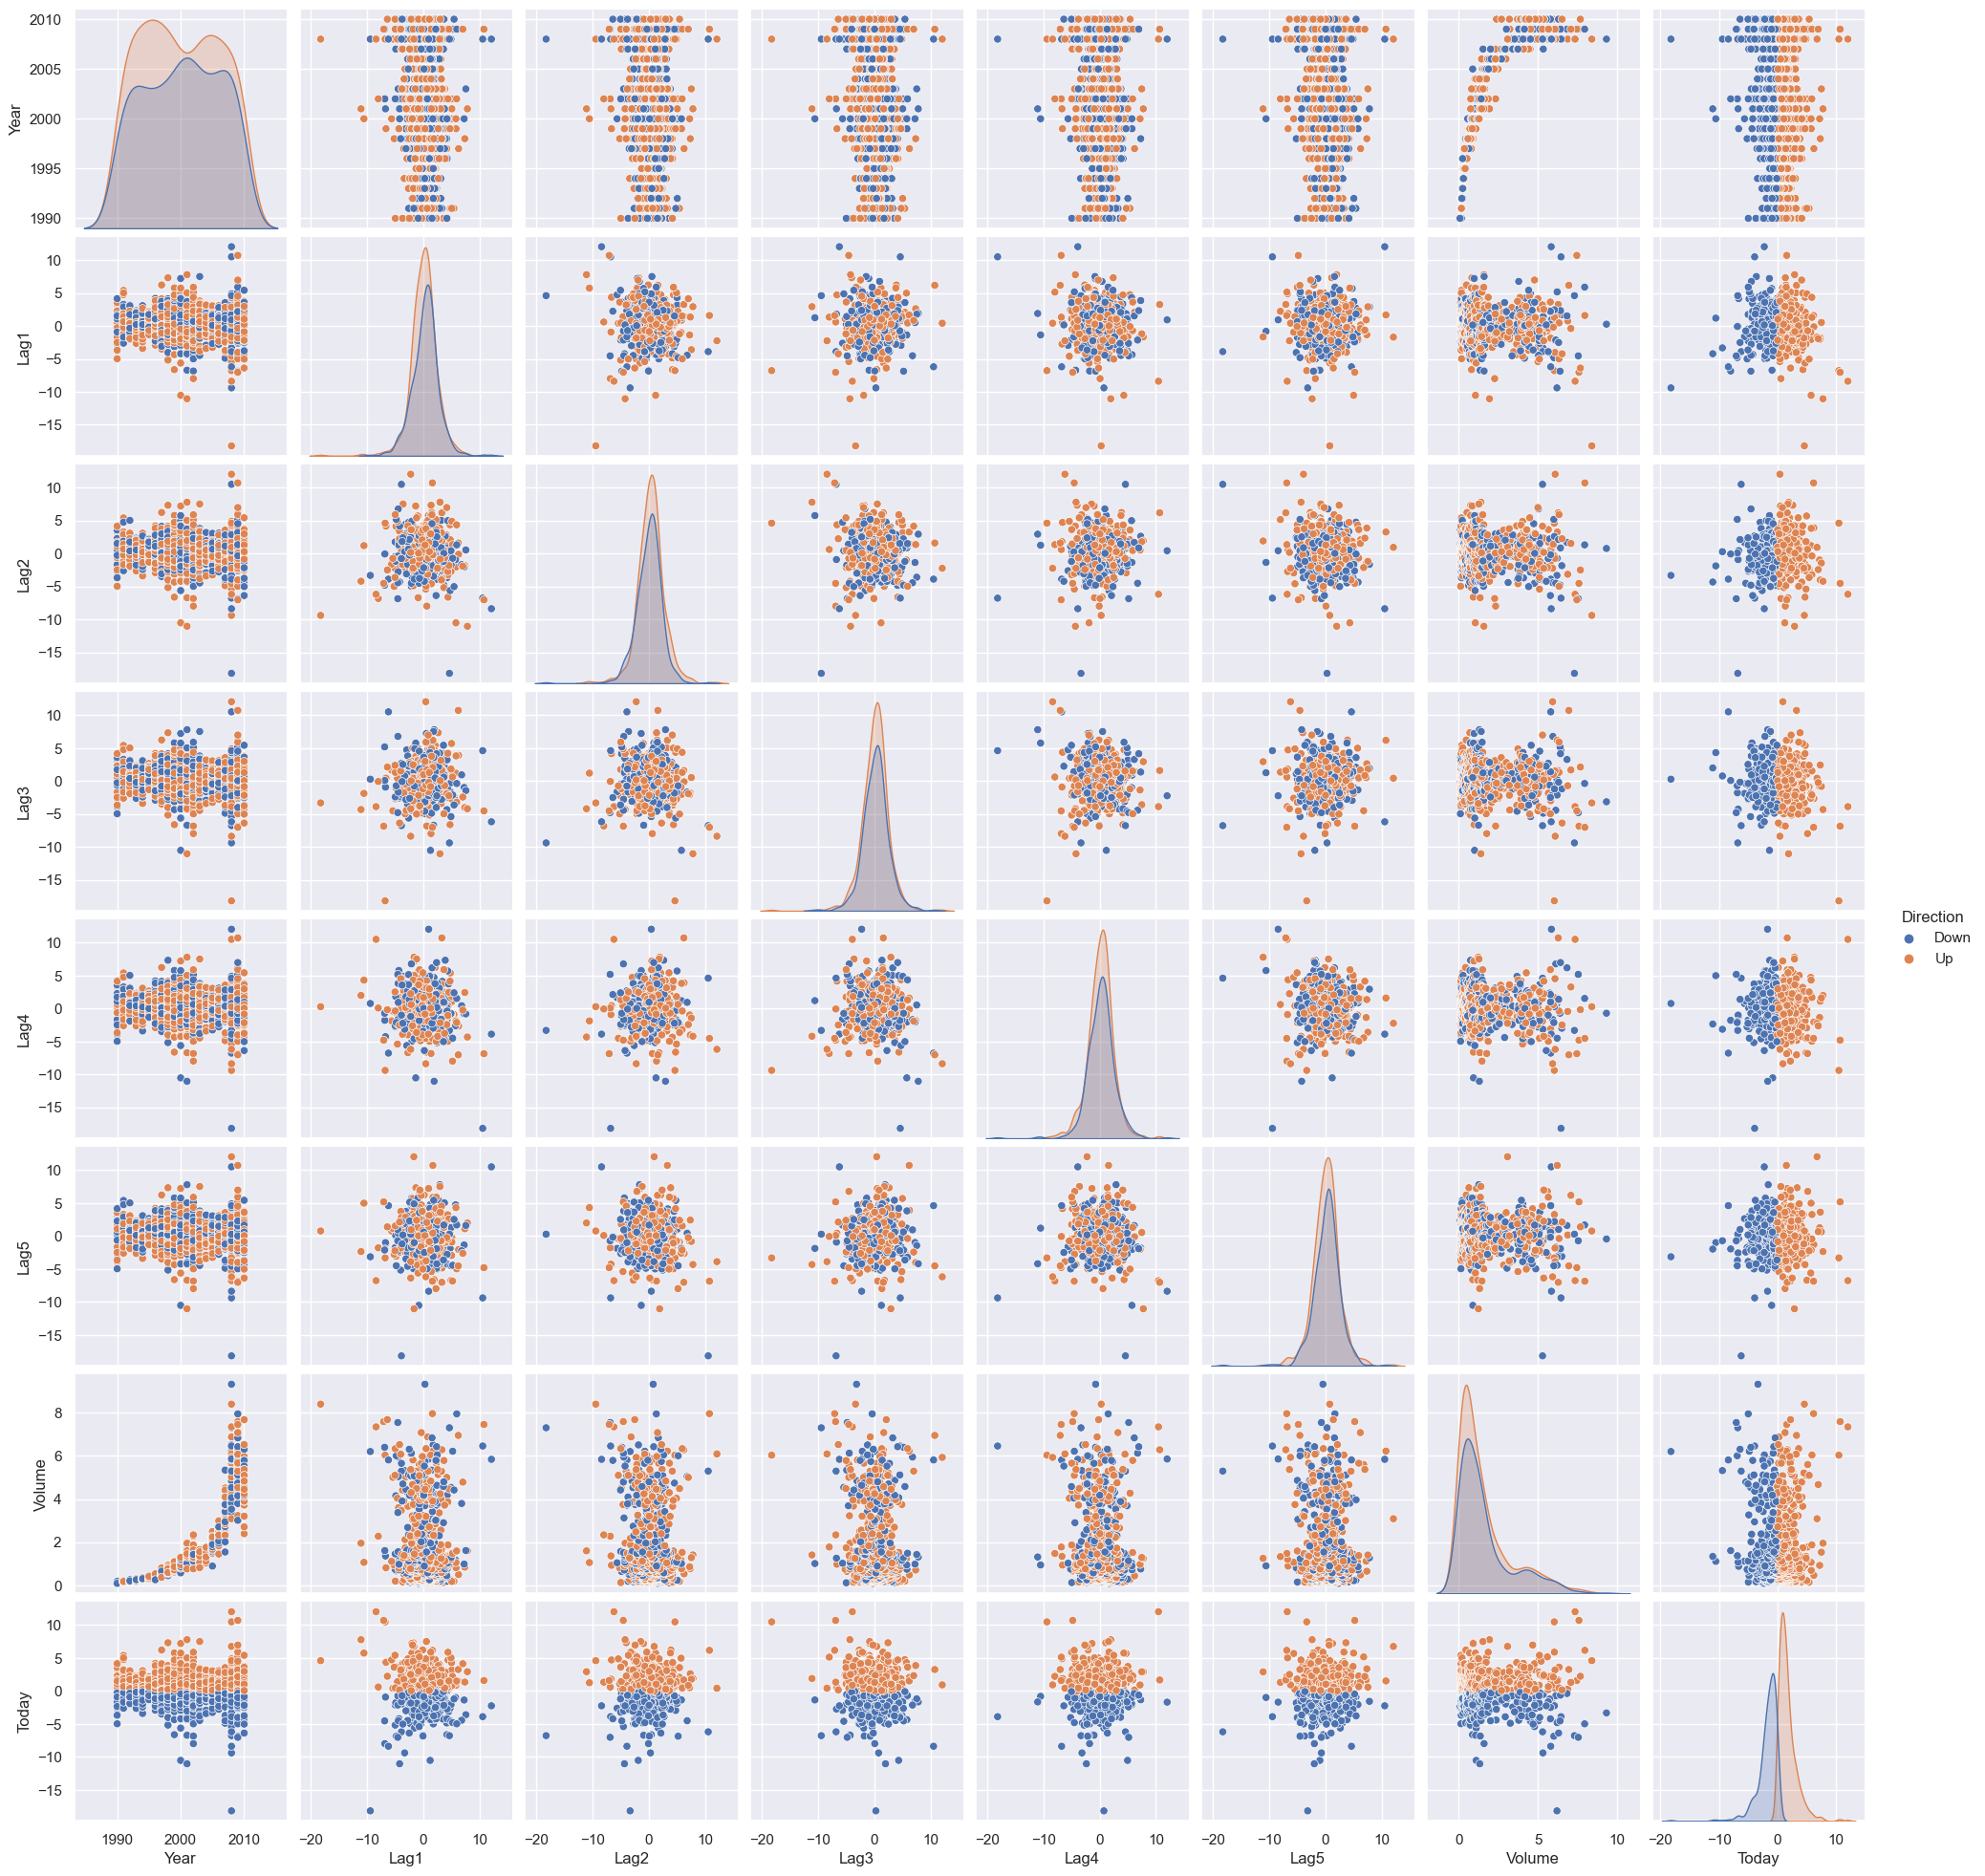

In [8]:
sns.pairplot(weekly, hue = "Direction");

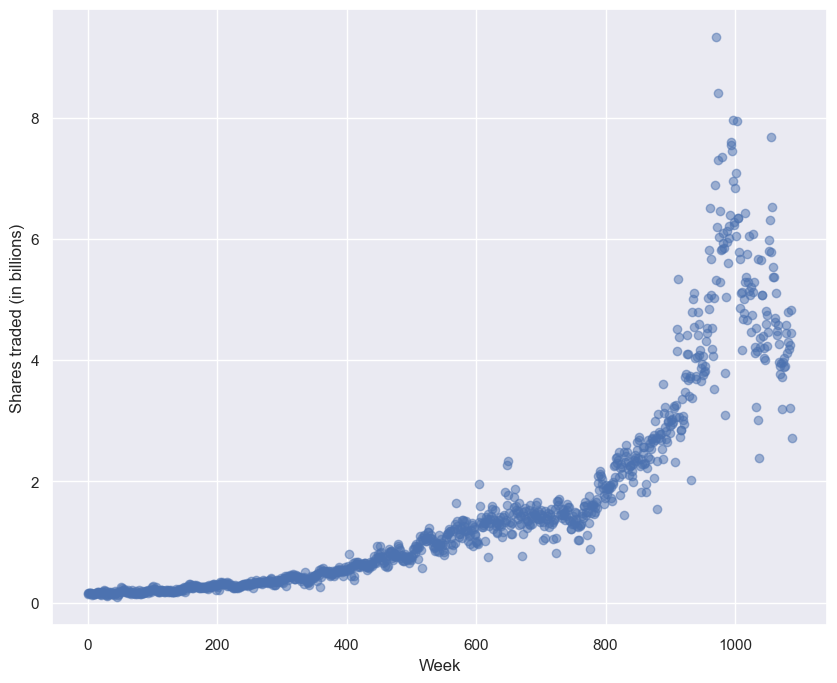

In [9]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes()
ax.scatter(x = weekly.index, y = weekly["Volume"], alpha = 0.5)
ax.set(xlabel = "Week", ylabel = "Shares traded (in billions)");

In [10]:
weekly.corr()

C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_13932\2100277423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


## Comments
- When looking at the initial summary stats and scatterplot matrix there doesn't appear to be any obvious trends/patterns other then the volume of shares traded each week has grown a lot from 1990 to 2010.
- Looking at the scatterplot more closely at just the volume over time there is a pattern in the number of shares traded each week which grew exponitentially over 21 years covered by the data.

- Looking at the matric of correlations between the variables we see a patterns in the last row where the lag variables are correlated slightly to today's returns. The sle substantial value of 0.842 between volume and year, aligns with the strong correlation in the scatterplot.

## (b)
Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [11]:
# Using the Logit class from StatsModels
endog = (weekly["Direction"] == "Up").astype("int64")
exog = sm.add_constant(weekly.drop(columns = ["Direction", "Year", "Today"]))
logit_mod = sm.Logit(endog, exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                0.006580
Time:                        20:48:11   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [12]:
pd.DataFrame({"Estimate": logit_res.params, "Std. Error": logit_res.bse, "z value": logit_res.tvalues,
             "Pr(>|z|)": logit_res.pvalues})

,Estimate,Std. Error,z value,Pr(>|z|)
const,0.266864,0.085930,3.105613,0.001899
Lag1,-0.041269,0.026410,-1.562610,0.118144
Lag2,0.058442,0.026865,2.175384,0.029601
Lag3,-0.016061,0.026663,-0.602376,0.546924
Lag4,-0.027790,0.026463,-1.050141,0.293653
Lag5,-0.014472,0.026385,-0.548501,0.583348
Volume,-0.022742,0.036898,-0.616333,0.537675


## Comments: 
- The sole predictor demonstrating statistical significance is Lag2, as evidenced by a p-value of 0.0296. This finding supports the rejection of the null hypothesis at the 5% significance level, suggesting a relationship with the response Direction. In contrast, none of the other predictors exhibit statistical significance. Lag1, while not statistically significant, approaches the 10% significance level, with a p-value of 0.1181.

## (c) 
Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression

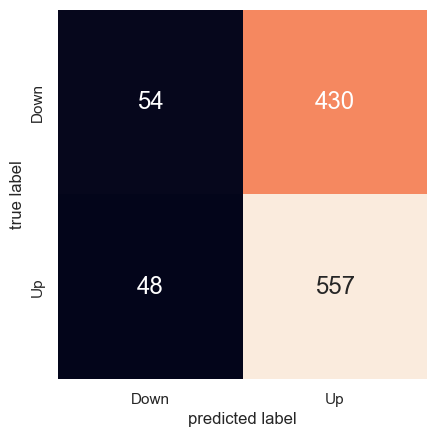

In [13]:
mat = pd.DataFrame(logit_res.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [14]:
logit_preds = pd.Series(logit_res.predict()).apply(lambda x: "Up" if (x > 0.5) else "Down")
(logit_preds == weekly["Direction"]).mean()

0.5610651974288338

## Comments:
- The confusion matrix is telling us about metrics related to predicting up weeks. The true positive rate, indicating the model's ability to correctly predict up weeks, is approximately 92%. However, the false positive rate, signifying the model's tendency to incorrectly predict up weeks, is relatively high at around 88%. The positive predictive value, representing the accuracy of positive predictions, is approximately 56%, demonstrating an improvement over chance but comparable to the simplistic strategy. The negative predictive value, indicating the accuracy of negative predictions, stands at around 53%. These metrics provide insights into the model's performance and its implications for predicting market direction.


## (d) 
Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [17]:
train_mask = (weekly["Year"] < 2009)

In [40]:
train_endog = (weekly.loc[train_mask, "Direction"] == "Up").astype("int64")
train_exog = sm.add_constant(weekly.loc[train_mask, "Lag2"])
logit_mod = sm.Logit(train_endog, train_exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                0.003076
Time:                        21:20:47   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [19]:
test_exog = sm.add_constant(weekly.loc[~train_mask, "Lag2"])
test_endog = weekly.loc[~train_mask, "Direction"]
logit_test_probs = logit_res.predict(test_exog)
logit_test_preds = pd.Series(logit_test_probs).apply(lambda x: "Up" if (x > 0.5) else "Down")

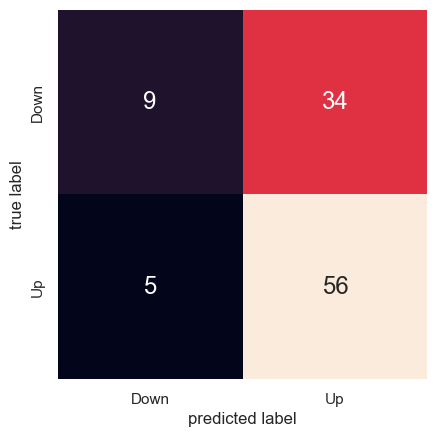

In [20]:
mat = pd.DataFrame(confusion_matrix(test_endog, logit_test_preds), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [21]:
(logit_test_preds == weekly.loc[~train_mask, "Direction"]).mean()

0.625

In [22]:
(weekly.loc[~train_mask, "Direction"] == "Up").mean()

0.5865384615384616

## (e)
Repeat (d) using LDA.

In [27]:
X_train = weekly.loc[train_mask, "Lag2"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "Lag2"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Fit the LDA model using the training set
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

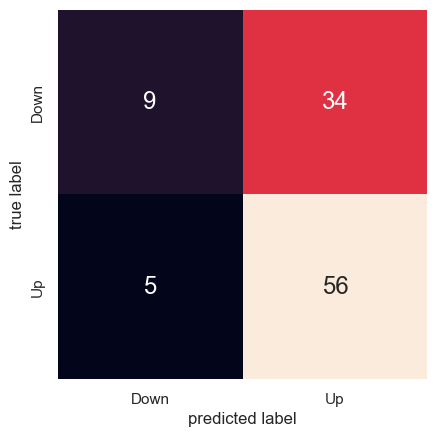

In [28]:
y_pred = lda_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = lda_clf.classes_, yticklabels = lda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [29]:
lda_clf.score(X_test, y_test)

0.625

## (f)
Repeat (d) using QDA.



In [33]:
X_train = weekly.loc[train_mask, "Lag2"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "Lag2"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Fit the QDA model using the training set
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

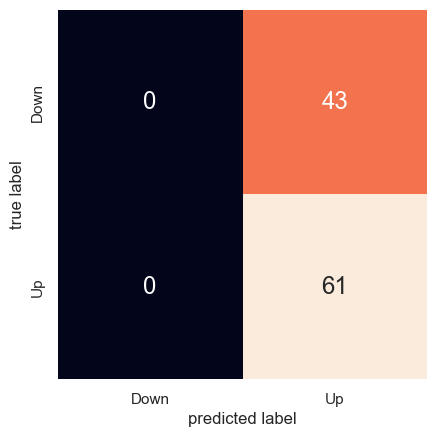

In [34]:
y_pred = qda_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = qda_clf.classes_, yticklabels = qda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [35]:
qda_clf.score(X_test, y_test)

0.5865384615384616

## (g) 
Repeat (d) using KNN with K = 1.

In [76]:
X_train = weekly.loc[train_mask, "Lag2"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "Lag2"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

np.random.seed(24)

knn_1_clf = KNeighborsClassifier(n_neighbors = 1)
knn_1_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

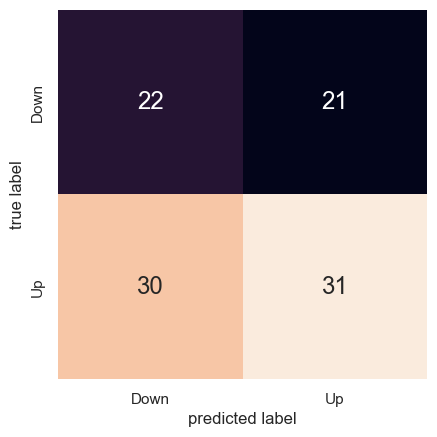

In [77]:
y_pred = knn_1_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = qda_clf.classes_, yticklabels = qda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [78]:
knn_1_clf.score(X_test, y_test)

0.5096153846153846

## (h) 
Repeat (d) using naive Bayes.

In [46]:
X = weekly[['Lag2']]
y = weekly['Direction']

In [48]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, shuffle=False)

In [49]:
nb_model = GaussianNB()
nb_model.fit(X_train[['Lag2']], y_train)

GaussianNB()

In [57]:
predictions = nb_model.predict(X_holdout)

In [58]:
cm = confusion_matrix(y_holdout, predictions)

[Text(0.5, 20.049999999999997, 'Predicted Label'),
 Text(110.44999999999997, 0.5, 'True Label')]

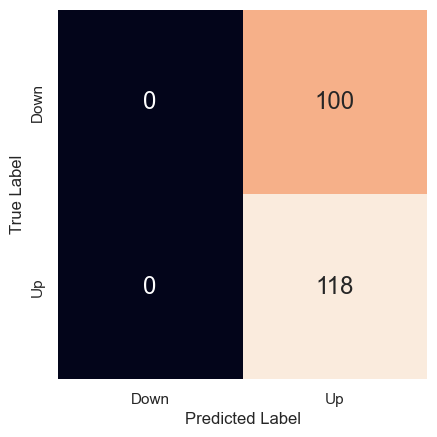

In [60]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cbar=False, ax=ax, fmt="g", square=True, annot_kws={"fontsize": "x-large"},
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
ax.set(xlabel="Predicted Label", ylabel="True Label")

In [61]:
overall_accuracy = accuracy_score(y_holdout, predictions)
print("\nOverall Accuracy:", overall_accuracy)


Overall Accuracy: 0.5412844036697247


## (i)
Which of these methods appears to provide the best results on this data?

- In terms of overall prediction accuracy, logistic regression and linear discriminant analysis performed equally well, being the top-performing models on the given data. Quadratic discriminant analysis ranked third, while k-nearest neighbors with k=1 performed poorly, even worse than random guessing and naively predicting every week as an up week. It's noteworthy that, except for KNN, the other three models had a strong inclination to predict up weeks, resulting in high false positive rates. This might be suitable for a risk-tolerant investor willing to take more chances, but a risk-averse investor may prefer a less aggressive model or a higher probability threshold before accepting predictions of up weeks.

## (j) 
Experiment with different combinations of predictors, including possible transformations and interactions, for each of themethods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [62]:
weighted_lag_avg = 0.4*weekly["Lag1"] + 0.35*weekly["Lag2"] + 0.15*weekly["Lag3"] + 0.05*weekly["Lag4"] + 0.05*weekly["Lag5"]
weekly["weighted_lag_avg"] = weighted_lag_avg
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,weighted_lag_avg
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0.10055
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0.20515
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,-1.12070
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,0.58290
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1.15560


In [63]:
weekly[["Today", "weighted_lag_avg"]].corr()

,Today,weighted_lag_avg
Today,1.000000,-0.037241
weighted_lag_avg,-0.037241,1.000000


In [ ]:
train_endog = (weekly.loc[train_mask, "Direction"] == "Up").astype("int64")
train_exog = sm.add_constant(weekly.loc[train_mask, "weighted_lag_avg"])
logit_mod = sm.Logit(train_endog, train_exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

In [64]:
test_exog = sm.add_constant(weekly.loc[~train_mask, "weighted_lag_avg"])
test_endog = weekly.loc[~train_mask, "Direction"]
logit_test_probs = logit_res.predict(test_exog)
logit_test_preds = pd.Series(logit_test_probs).apply(lambda x: "Up" if (x > 0.5) else "Down")

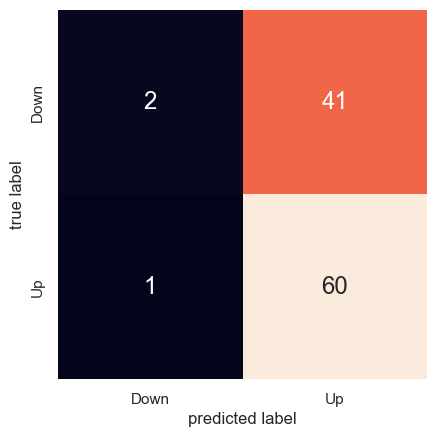

In [65]:
mat = pd.DataFrame(confusion_matrix(test_endog, logit_test_preds), columns = ["Down", "Up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [66]:
(logit_test_preds == weekly.loc[~train_mask, "Direction"]).mean()

0.5961538461538461

## Comments: 
- The outcomes from logistic regression are not very promising, as using a prediction threshold of 50% led to results equivalent to consistently predicting that the market would rise when assessed on the test set. Moreover, the p-value for the coefficient of "weighted_lag_avg" is 0.599, indicating a lack of evidence to assert its statistical significance. Upon further consideration of the concept of employing a weighted average, it is reasonable to expect that the performance with logistic regression would not offer an improvement over the approach used in Part 4. This is because the weighted average still represents a linear combination of variables. In a logistic regression model, we previously observed that Lag2 was the only statistically significant coefficient, and even then, it is borderline at the 5% significance level. Thus, the weighted average incorporates variables that were not deemed particularly helpful in constructing a robust model. Despite this, I will proceed to evaluate the remaining methods with "weighted_lag_avg" before exploring another combination of predictors. The next method to be examined is linear discriminant analysis.

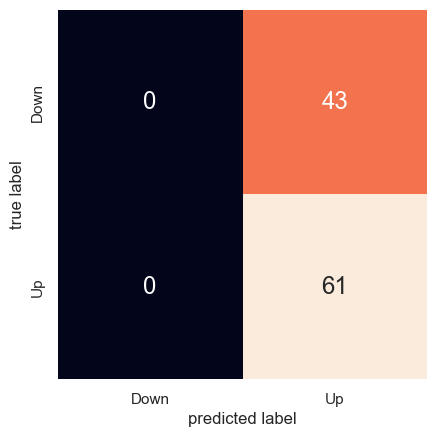

In [79]:
X_train = weekly.loc[train_mask, "weighted_lag_avg"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "weighted_lag_avg"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Fit the LDA model using the training set
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

y_pred = lda_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = lda_clf.classes_, yticklabels = lda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");


In [69]:
lda_clf.score(X_test, y_test)

0.5865384615384616

## Comments:
- Linear discriminant analysis has the same performance as logistic regression. This is reasonable because the two methods often perform similarly.

In [71]:
X_train = weekly.loc[train_mask, "weighted_lag_avg"].to_frame()
y_train = weekly.loc[train_mask, "Direction"]
X_test = weekly.loc[~train_mask, "weighted_lag_avg"].to_frame()
y_test = weekly.loc[~train_mask, "Direction"]

# Fit the QDA model using the training set
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

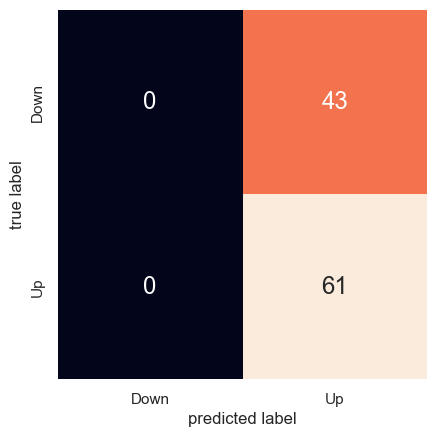

In [72]:
y_pred = qda_clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = qda_clf.classes_, yticklabels = qda_clf.classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [73]:
qda_clf.score(X_test, y_test)

0.5865384615384616

In [74]:
qda_clf.predict_proba(X_test).max()

0.9435257061804726

## Comments: 
- Quadratic discriminant analysis exhibited similar performance; however, upon examining the maximum value in the n-dimensional array of posterior probabilities, I observed that the highest probability from QDA is 0.943. This suggests that experimenting with a more stringent threshold for predicting an up week could be worthwhile. I will explore a threshold of 60%.

## Question 14:
In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

In [81]:
auto = pd.read_csv("Auto.csv", na_values = ["?"]).dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [82]:
auto["origin"] = auto["origin"].map({1: "American", 2: "European", 3: "Japanese"})
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


## (a) 
create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows

In [83]:
mpg_med = (auto["mpg"] > auto["mpg"].median()).map({False: "Below", True: "Above"})
auto["mpg_med"] = mpg_med
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_med
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,Below
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,Below
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,Below
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,Below
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,Below


## (b)

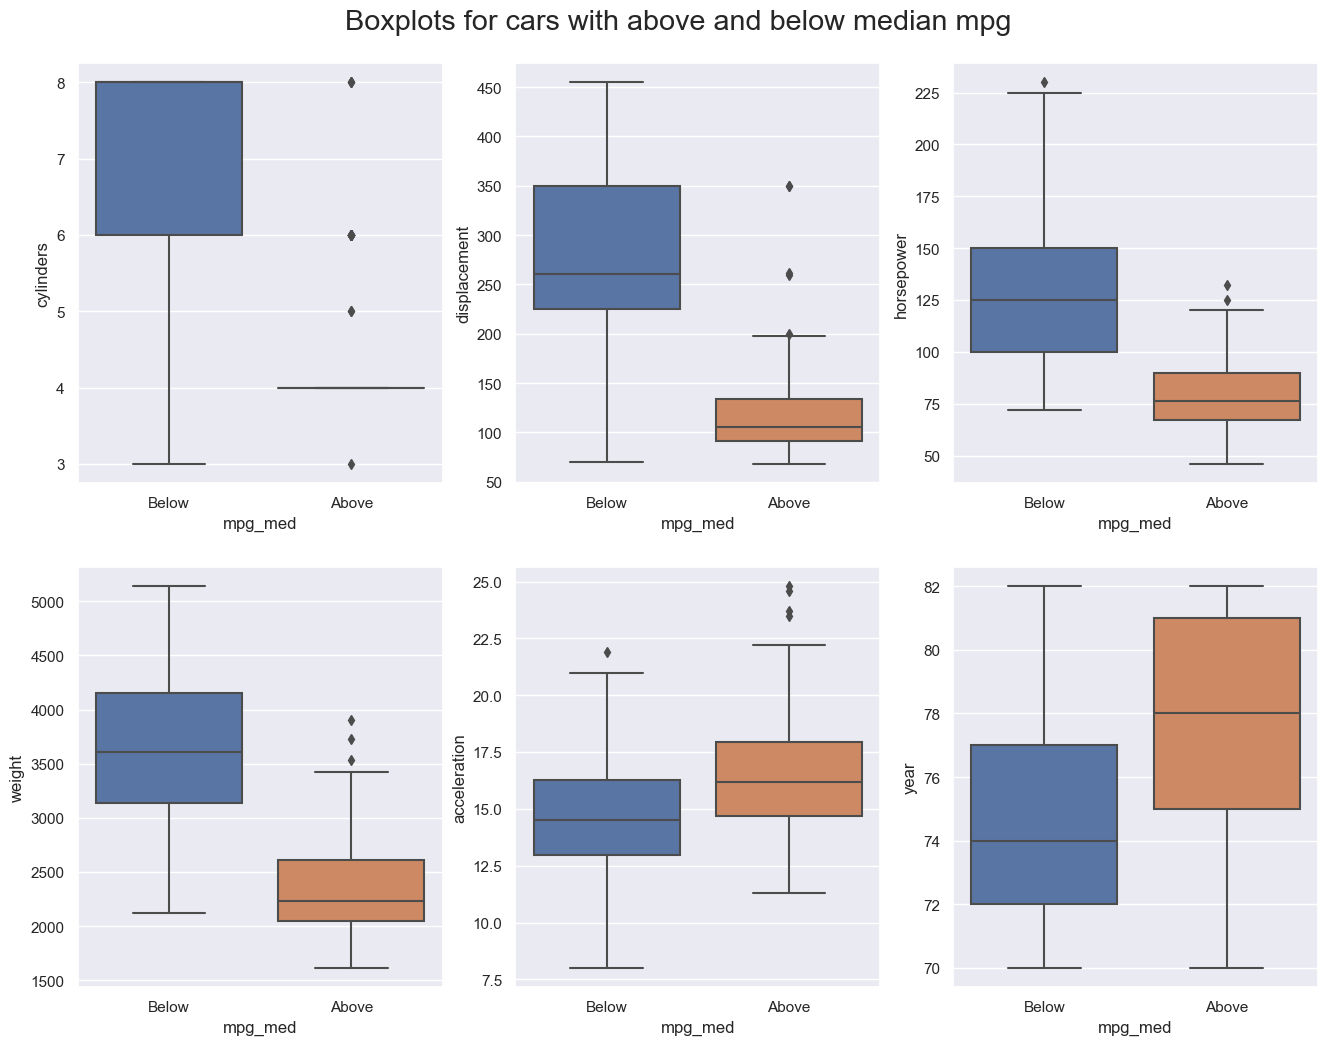

In [84]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "mpg_med", y = "cylinders", data = auto, ax = axes[0, 0])
sns.boxplot(x = "mpg_med", y = "displacement", data = auto, ax = axes[0, 1])
sns.boxplot(x = "mpg_med", y = "horsepower", data = auto, ax = axes[0, 2])
sns.boxplot(x = "mpg_med", y = "weight", data = auto, ax = axes[1, 0])
sns.boxplot(x = "mpg_med", y = "acceleration", data = auto, ax = axes[1, 1])
sns.boxplot(x = "mpg_med", y = "year", data = auto, ax = axes[1, 2])
fig.suptitle("Boxplots for cars with above and below median mpg", size = "xx-large", y = 0.925);

C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_13932\2008068781.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto.loc[auto["mpg_med"] == "Below", "cylinders"], ax = axes[0, 0])
C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_13932\2008068781.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

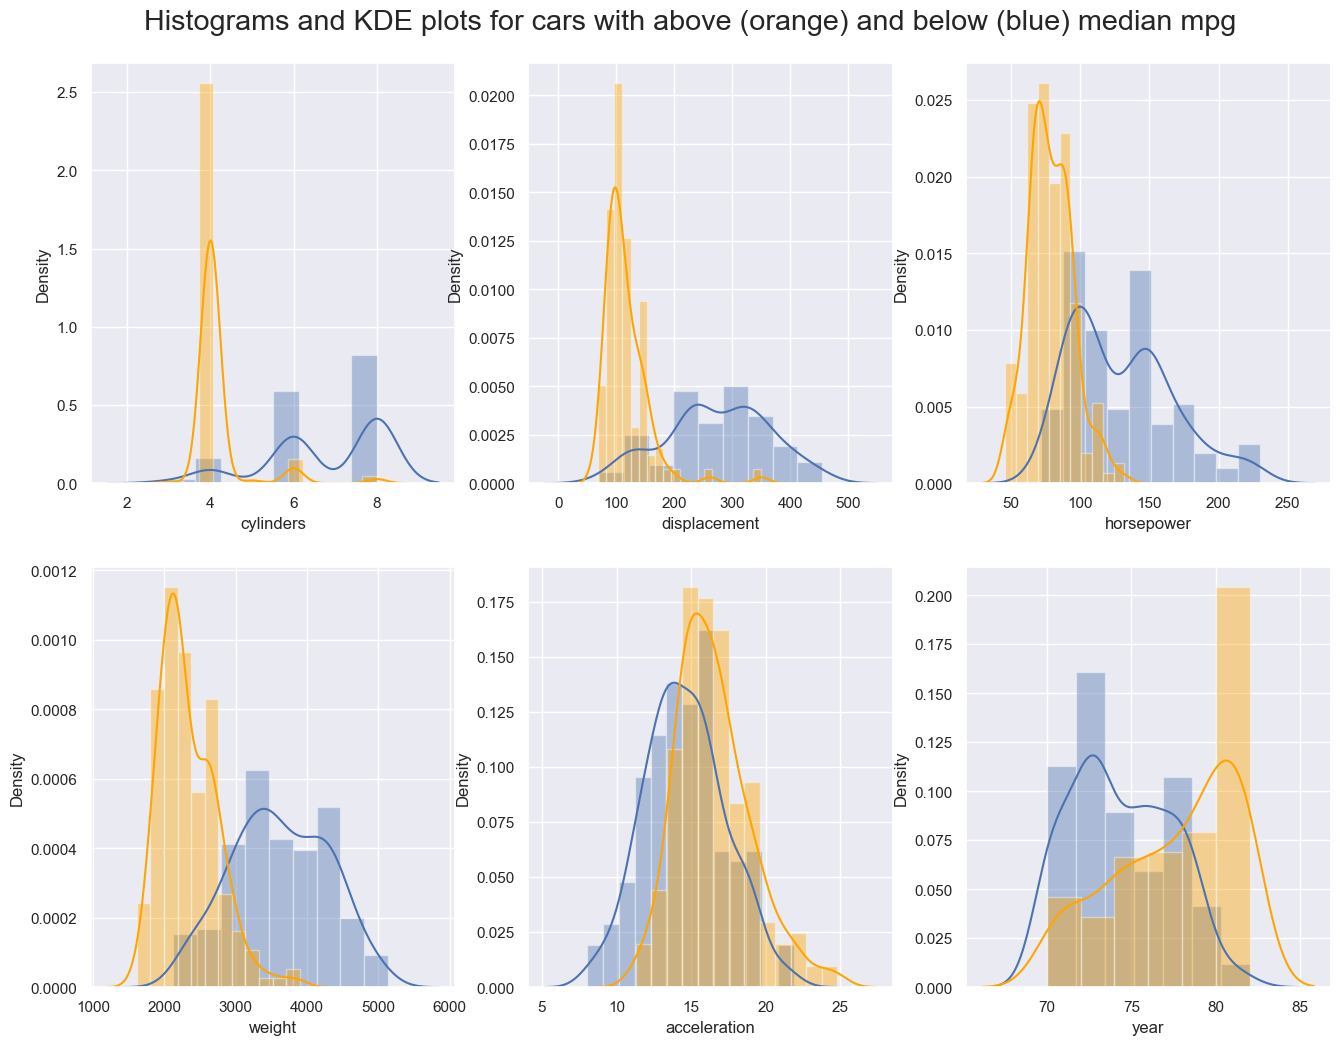

In [85]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.distplot(auto.loc[auto["mpg_med"] == "Below", "cylinders"], ax = axes[0, 0])
sns.distplot(auto.loc[auto["mpg_med"] == "Above", "cylinders"], ax = axes[0, 0], color = "orange")
sns.distplot(auto.loc[auto["mpg_med"] == "Below", "displacement"], ax = axes[0, 1])
sns.distplot(auto.loc[auto["mpg_med"] == "Above", "displacement"], ax = axes[0, 1], color = "orange")
sns.distplot(auto.loc[auto["mpg_med"] == "Below", "horsepower"], ax = axes[0, 2])
sns.distplot(auto.loc[auto["mpg_med"] == "Above", "horsepower"], ax = axes[0, 2], color = "orange")
sns.distplot(auto.loc[auto["mpg_med"] == "Below", "weight"], ax = axes[1, 0])
sns.distplot(auto.loc[auto["mpg_med"] == "Above", "weight"], ax = axes[1, 0], color = "orange")
sns.distplot(auto.loc[auto["mpg_med"] == "Below", "acceleration"], ax = axes[1, 1])
sns.distplot(auto.loc[auto["mpg_med"] == "Above", "acceleration"], ax = axes[1, 1], color = "orange")
sns.distplot(auto.loc[auto["mpg_med"] == "Below", "year"], ax = axes[1, 2])
sns.distplot(auto.loc[auto["mpg_med"] == "Above", "year"], ax = axes[1, 2], color = "orange")
fig.suptitle("Histograms and KDE plots for cars with above (orange) and below (blue) median mpg",
             size = "xx-large", y = 0.925);

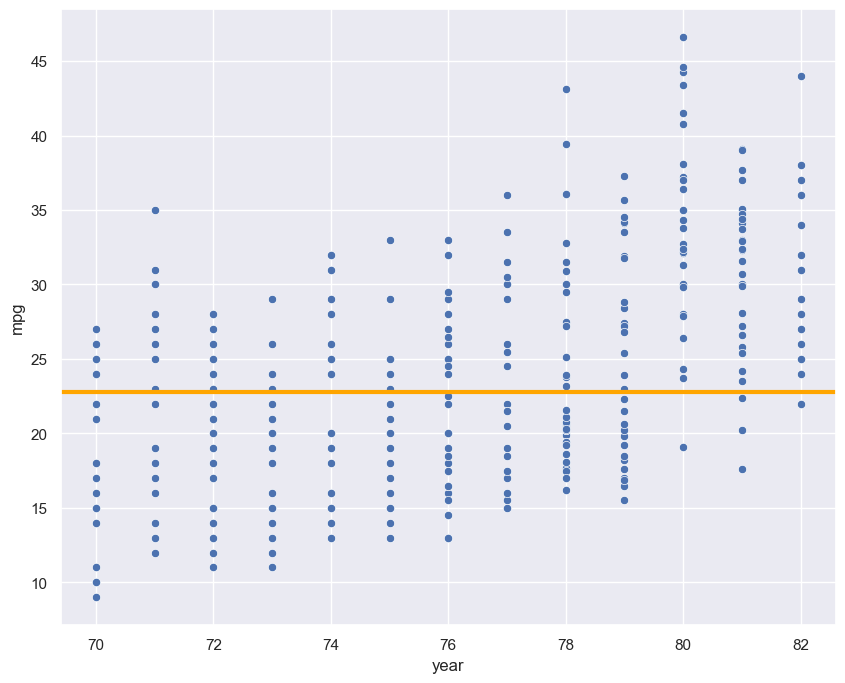

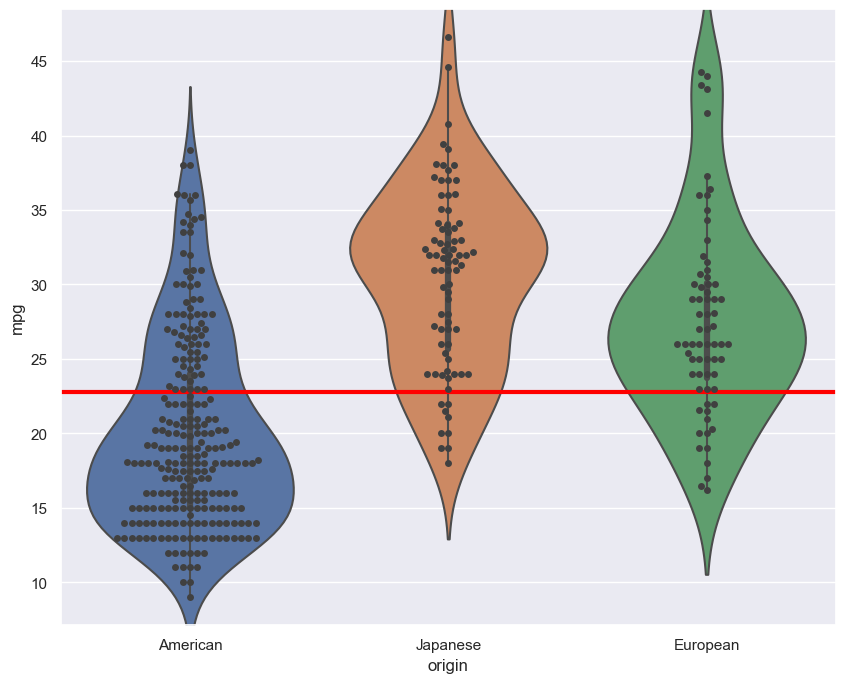

In [87]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = "year", y = "mpg", data = auto, ax = ax)
ax.axhline(y = auto["mpg"].median(), color = "orange", linewidth = 3);

fig, ax = plt.subplots(figsize = (10, 8))
sns.violinplot(x = "origin", y = "mpg", data = auto, ax = ax)
sns.swarmplot(x = "origin", y = "mpg", data = auto, ax = ax, color = ".25")
ax.axhline(y = auto["mpg"].median(), color = "red", linewidth = 3);

## Comments:
- There's clear difference between American cars, and European and Japanese cars. Where American cars have below-median fuel efficiency and the other two have above-median fuel efficiency.
- The Origin variable seems to be the most useful inpredicting mpg_med. 
- The scatter plot of mpg vs year shows that newer cars tend to be more fuel efficient. 
- The histograms gave us evidence that horsepower and weight are more useful in predicting mpg_med. 
- The boxplots show that cylinders, displacement, horsepower and weight will be the most useful at predicting mpg_med. 


## (c) 
Split the data into a training set and a test set.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(auto, auto["mpg_med"], test_size = 0.25, random_state = 312)

## (d) 
Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [92]:
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", LinearDiscriminantAnalysis())])

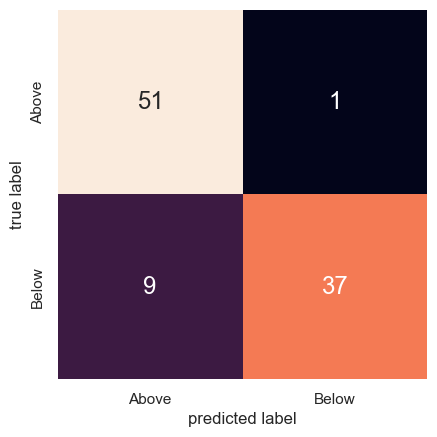

In [95]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [96]:
1 - clf.score(X_test, y_test)

0.10204081632653061

In [98]:
categorical_features = []
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", LinearDiscriminantAnalysis())])

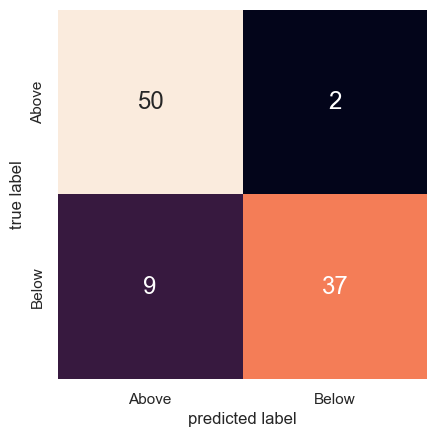

In [99]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [100]:
1 - clf.score(X_test, y_test)

0.11224489795918369

## Comments: 
- The test error is 11.2% without origin and year. 

## (e) 
Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [101]:
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", QuadraticDiscriminantAnalysis())])

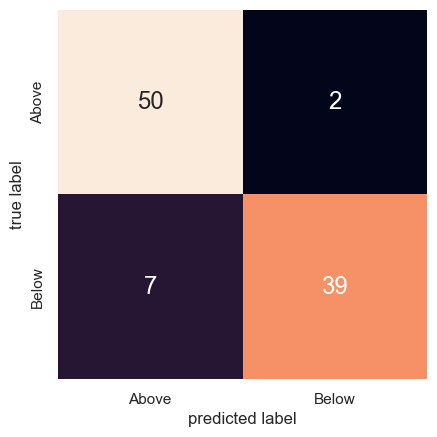

In [102]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [ ]:
1 - clf.score(X_test, y_test)

In [103]:
categorical_features = []
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", QuadraticDiscriminantAnalysis())])

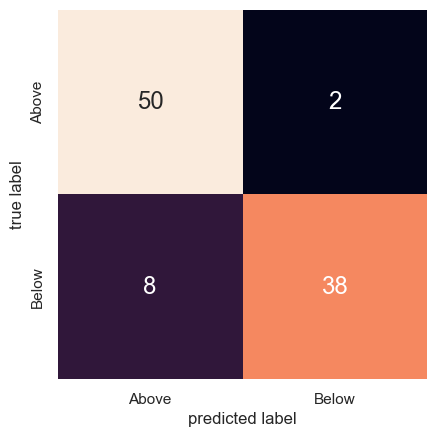

In [104]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [105]:
1 - clf.score(X_test, y_test)

0.10204081632653061

## Comments: 
- The test error is 10.2% without origin and year variables. The preformance here is similar to the linear discriminant analysis above with all the original predictors, the only difference being the confusion matrix. This model had a lower FP, and TP and TN but a higher TP.

## (f) 
Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [ ]:
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])

In [106]:
1 - clf.score(X_test, y_test)

0.10204081632653061

In [107]:
categorical_features = []
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs", max_iter = 500))])

C:\Users\Tara Grey\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


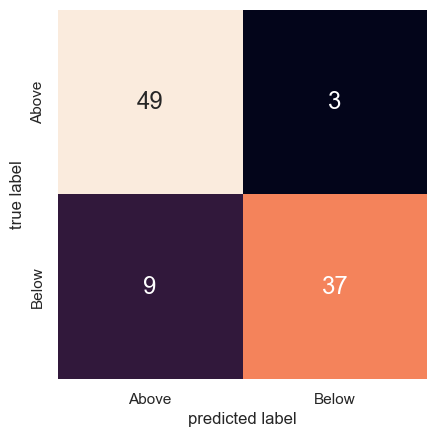

In [108]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [109]:
1 - clf.score(X_test, y_test)

0.12244897959183676

## Comments: 
- Without origin and year the test error is 12.24%

## (g) 
Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

## (h) 
Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [111]:
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 2))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf.score(X_test, y_test)
pd.Series(knn_errors)

1     0.081633
3     0.081633
5     0.081633
7     0.091837
9     0.091837
11    0.102041
13    0.081633
15    0.081633
17    0.081633
19    0.081633
dtype: float64

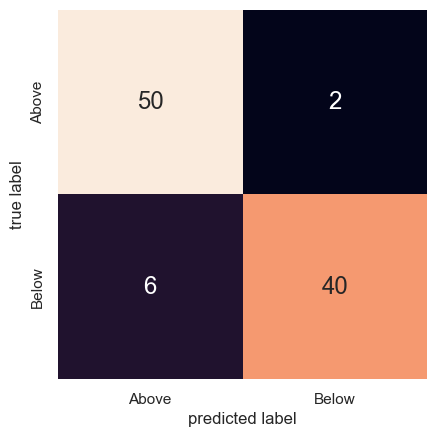

In [112]:
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [113]:
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 2))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf.score(X_test, y_test)
pd.Series(knn_errors)

1     0.112245
3     0.102041
5     0.112245
7     0.102041
9     0.091837
11    0.091837
13    0.091837
15    0.091837
17    0.091837
19    0.091837
dtype: float64

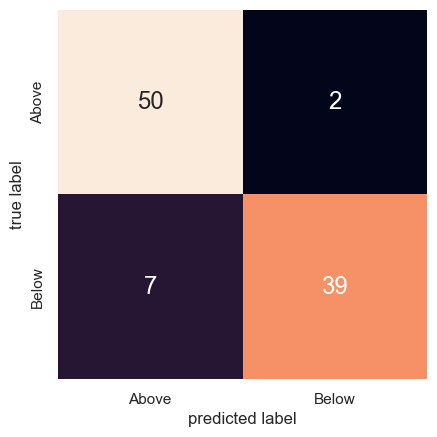

In [114]:
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

## Comments:
- The test error at k=9 (where the test error is at the lowest) is 9.18% without the vairable year.
- k = 1 performed the best on this model. 

## 16
Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using
various subsets of the predictors. Describe your findings.

In [7]:
boston = pd.read_csv("Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0) 

array([[<Axes: xlabel='indus', ylabel='indus'>,
        <Axes: xlabel='chas', ylabel='indus'>,
        <Axes: xlabel='nox', ylabel='indus'>,
        <Axes: xlabel='rm', ylabel='indus'>,
        <Axes: xlabel='age', ylabel='indus'>,
        <Axes: xlabel='dis', ylabel='indus'>,
        <Axes: xlabel='rad', ylabel='indus'>,
        <Axes: xlabel='tax', ylabel='indus'>,
        <Axes: xlabel='ptratio', ylabel='indus'>,
        <Axes: xlabel='black', ylabel='indus'>,
        <Axes: xlabel='lstat', ylabel='indus'>,
        <Axes: xlabel='medv', ylabel='indus'>,
        <Axes: xlabel='crim01', ylabel='indus'>],
       [<Axes: xlabel='indus', ylabel='chas'>,
        <Axes: xlabel='chas', ylabel='chas'>,
        <Axes: xlabel='nox', ylabel='chas'>,
        <Axes: xlabel='rm', ylabel='chas'>,
        <Axes: xlabel='age', ylabel='chas'>,
        <Axes: xlabel='dis', ylabel='chas'>,
        <Axes: xlabel='rad', ylabel='chas'>,
        <Axes: xlabel='tax', ylabel='chas'>,
        <Axes: xlabel='pt

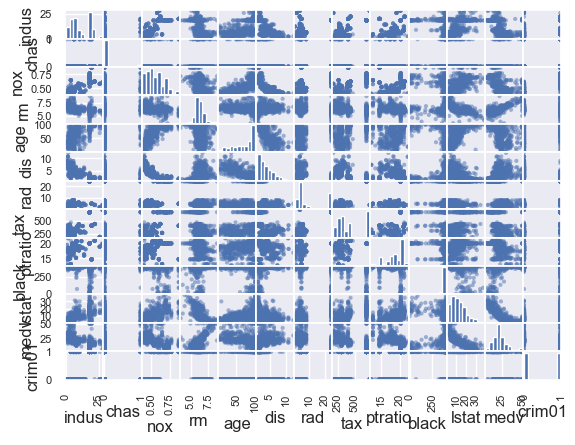

In [11]:
boston.corr()
pd.plotting.scatter_matrix(boston.iloc[:,2:17]) 


In [14]:
x_name = ['indus', 'nox', 'dis', 'tax', 'lstat']
x      = pd.DataFrame(boston, columns=x_name)
y      = np.array(boston['crim01'])

In [21]:
np.random.seed(24)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
glm      = LogisticRegression()
glm.pred = glm.fit(x_train, y_train).predict(x_test)
print(pd.DataFrame(confusion_matrix(y_test, glm.pred), index=['y=0', 'y=1'], columns=['y_pred=0', 'y_pred=1']))
print('error rate: ', 1-accuracy_score(y_test, glm.pred)) 

     y_pred=0  y_pred=1
y=0        61        17
y=1        20        54
error rate:  0.24342105263157898


## Findings: 
- The logistic regression model perfomed with an overall test error of 2.43%.

In [17]:
lda      = LinearDiscriminantAnalysis() 
lda.pred = lda.fit(x_train, y_train).predict(x_test)
print(pd.DataFrame(confusion_matrix(y_test, lda.pred), index=['y=0', 'y=1'], columns=['y_pred=0', 'y_pred=1']))
print('error rate: ', 1-accuracy_score(y_test, lda.pred))

     y_pred=0  y_pred=1
y=0        66        12
y=1        21        53
error rate:  0.2171052631578947


## Findings:
- Had a overall test error of 2.17%. 
- This test error is better then the Logisitc regression models. 

In [18]:
qda      = QuadraticDiscriminantAnalysis()
qda.pred = qda.fit(x_train, y_train).predict(x_test)
print(pd.DataFrame(confusion_matrix(y_test, qda.pred), index=['y=0', 'y=1'], columns=['y_pred=0', 'y_pred=1']))
print('error rate: ', 1-accuracy_score(y_test, qda.pred))

     y_pred=0  y_pred=1
y=0        62        16
y=1        17        57
error rate:  0.2171052631578947


## Findings:
- QDA also has a test error of 2.17% exactly like LDA. 

In [25]:
error_rate = np.array([]) 
k_value    = np.array([]) 
for i in range(1, 110, 10):  
    knn        = KNeighborsClassifier(n_neighbors=i)
    knn.pred   = knn.fit(x_train, y_train).predict(x_test) 
    k_value    = np.append(k_value, i)
    error_rate = np.append(error_rate, 1-accuracy_score(y_test, knn.pred))

In [26]:
best_k = k_value[error_rate.argmin()]
print('KNN best when k=%i' %best_k)

KNN best when k=1


## Findings:
- The values of K with the lowest overall test error is k = 1 with an overall test error
